# PIPELINE

A large number of words in the data is divided into parts by spaces, so it makes sense to try using q-grams *(just my hypothesis which I want to test)*. I guess it would be more suitable to try 4q-grams because such a range can cover the surroundings around the gap and further at a greater distance. However BOW vectorization by 4q-grams negatively affects the convergence of logistic regression, so for this case I have reduced the range to 3q-grams *(moreover it will be computationally easier)*.

I'll make different pipelines and compare metrics in the table. 
Methods that I'm going to use (just in case of practising):

**Vectorization** (on preprocessed and non-preprocessed data):
- BOW (Bag of Words), q-grams (and not)
- TF-IDF, q-grams (and not)

**Models** (some default methods that I understand from different families):
- Logistig Regression
- Naive Baise
- KNN (k-nearest neighbours)
- Linear SVM (support vector machine)


# Classification

In [268]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from time import perf_counter
from warnings import simplefilter

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [269]:
df = pd.read_csv('school.csv').dropna()
df_norm = pd.read_csv('school_normalized.csv')

Let's look at the balance of classes

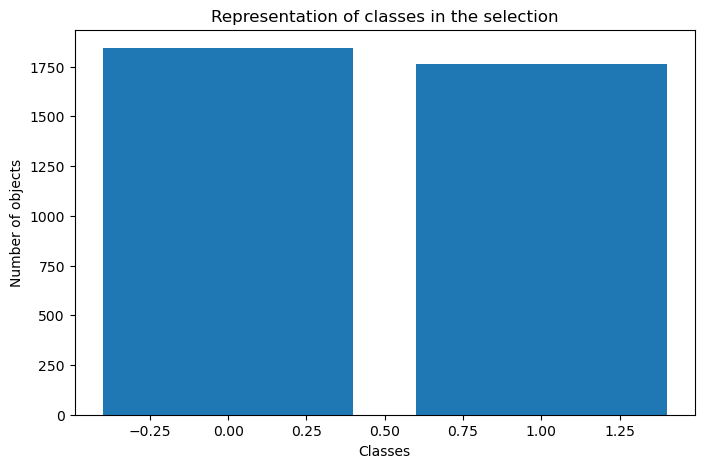

In [270]:
plt.figure(figsize=(8, 5))
plt.bar(df['school'].value_counts().index, df['school'].value_counts().values)
plt.xlabel('Classes')
plt.ylabel('Number of objects')
plt.title('Representation of classes in the selection')
plt.show()

In fact, the balance of binary classes is approximately equal: **the school's website** (1) and **another website** (0)

Some dictionaries for ease of use in a common template within training cycles.

In [92]:
preprocessing = {'non-prepocessed': df,
                 'preprocessed': df_norm}

vector_models = {'BOW 3q-grams': CountVectorizer(ngram_range=(1,3), analyzer='char'),
                 'BOW': CountVectorizer(), 
                 'TF-IDF 4q-grams': TfidfVectorizer(ngram_range=(1,4), analyzer='char'), 
                 'TF-IDF': TfidfVectorizer()}

seed = 420
models = {'LogReg': LogisticRegression(max_iter=2000, random_state=seed), 
          'NB': MultinomialNB(), 
          'KNN': KNeighborsClassifier(), 
          'SVM': SVC(kernel='linear', random_state=seed)}


scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1', 'roc_auc']

A template for a table of all the results and values that I'm going to measure.

In [93]:
score_table = pd.DataFrame(columns=["embeddings", "classifier", "normalization", 
                                    "fit time", "score time",
                                    "accuracy", "precision macro", "recall macro", "f1 score", "roc auc"])

To measure the results I'll use a cross validation with 5 batches. 

In [94]:
# simplefilter refers to one of my unresolved issues at the end of the notebook
simplefilter(action='ignore', category=FutureWarning)
start = perf_counter()


for data_type in preprocessing:
    
    X = preprocessing[data_type]['main_page']
    Y = preprocessing[data_type]['school']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                  random_state=seed, shuffle=True, stratify=Y)
    
    for vector_type in vector_models:
        for model_type in models:
            
            pipe = make_pipeline(vector_models[vector_type], models[model_type])
            scores = cross_validate(pipe, X_train, y_train, cv=5, scoring=scoring)

            score_table.loc[len(score_table)] = [vector_type, model_type, data_type,
                                                 scores['fit_time'].mean(), 
                                                 scores['score_time'].mean(),
                                                 scores['test_accuracy'].mean(),
                                                 scores['test_precision_macro'].mean(),
                                                 scores['test_recall_macro'].mean(),
                                                 scores['test_f1'].mean(), 
                                                 scores['test_roc_auc'].mean()]
            
            print(f'model ={model_type} with embeddings ={vector_type} and {data_type} data is done')
            
print(f'{perf_counter() - start} sec')

model =LogReg with embeddings =BOW 3q-grams and non-prepocessed data is done
model =NB with embeddings =BOW 3q-grams and non-prepocessed data is done
model =KNN with embeddings =BOW 3q-grams and non-prepocessed data is done
model =SVM with embeddings =BOW 3q-grams and non-prepocessed data is done
model =LogReg with embeddings =BOW and non-prepocessed data is done
model =NB with embeddings =BOW and non-prepocessed data is done
model =KNN with embeddings =BOW and non-prepocessed data is done
model =SVM with embeddings =BOW and non-prepocessed data is done
model =LogReg with embeddings =TF-IDF 4q-grams and non-prepocessed data is done
model =NB with embeddings =TF-IDF 4q-grams and non-prepocessed data is done
model =KNN with embeddings =TF-IDF 4q-grams and non-prepocessed data is done
model =SVM with embeddings =TF-IDF 4q-grams and non-prepocessed data is done
model =LogReg with embeddings =TF-IDF and non-prepocessed data is done
model =NB with embeddings =TF-IDF and non-prepocessed data 

In [95]:
score_table

,embeddings,classifier,normalization,fit time,score time,accuracy,precision macro,recall macro,f1 score,roc auc
0,BOW 3q-grams,LogReg,non-prepocessed,44.734639,5.152889,0.875483,0.876079,0.875068,0.870517,0.923961
1,BOW 3q-grams,NB,non-prepocessed,10.706098,5.230181,0.821726,0.822532,0.821174,0.813890,0.846148
2,BOW 3q-grams,KNN,non-prepocessed,10.703377,8.826424,0.753382,0.759648,0.755004,0.766154,0.844774
3,BOW 3q-grams,SVM,non-prepocessed,27.296346,10.060656,0.840094,0.841281,0.840089,0.836876,0.893590
4,BOW,LogReg,non-prepocessed,3.654028,0.390732,0.878252,0.881189,0.877343,0.870484,0.938816
5,BOW,NB,non-prepocessed,1.120330,0.373205,0.841149,0.844484,0.842213,0.845439,0.895157
6,BOW,KNN,non-prepocessed,1.097858,0.598313,0.681927,0.741807,0.676140,0.563026,0.709131
7,BOW,SVM,non-prepocessed,3.219775,1.056939,0.842526,0.842981,0.842238,0.837376,0.904832
8,TF-IDF 4q-grams,LogReg,non-prepocessed,23.249001,8.819876,0.872020,0.881416,0.870343,0.858333,0.952238
9,TF-IDF 4q-grams,NB,non-prepocessed,19.593553,8.874914,0.804373,0.834641,0.807731,0.827010,0.936383


# Analysis and visualization of results

In [162]:
preproc = score_table[score_table['normalization'] == 'preprocessed']
non_preproc = score_table[score_table['normalization'] == 'non-prepocessed']

data_y = preproc['embeddings'] + ' ' + preproc['classifier']

In [261]:
# a template for the comparison of metrics
def plot(t):
    idxmin, mn = score_table[t].idxmin(), score_table[t].min()
    idxmax, mx = score_table[t].idxmax(), score_table[t].max()
    pattern = score_table['embeddings'] + ' ' + score_table['classifier'] + ' ' + score_table['normalization']
    
    print(f'min value: {pattern[idxmin]} == {mn}')
    print(f'max value: {pattern[idxmax]} == {mx}')
    
    plt.plot(preproc[t], data_y, label='preprocessed')
    plt.plot(non_preproc[t], data_y, label='non-preprocessed')
    plt.legend()
    plt.title(f'Comparison of metrics: {t}')
    plt.grid()
    plt.show()

min value: BOW KNN preprocessed == 0.5781325817108154
max value: TF-IDF 4q-grams SVM non-prepocessed == 58.34284157752991


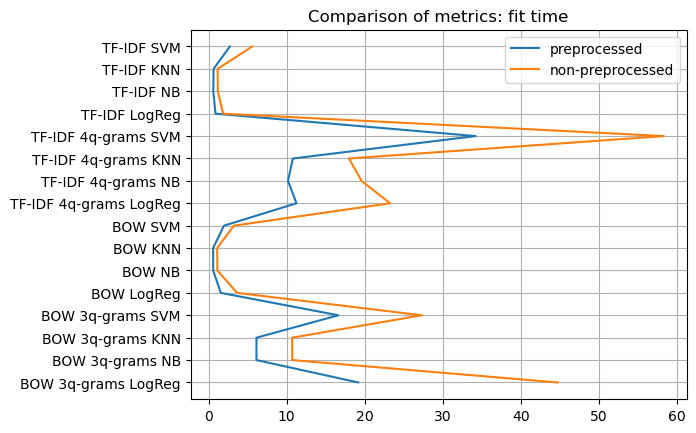

In [262]:
plot('fit time')

min value: BOW LogReg preprocessed == 0.22812538146972655
max value: TF-IDF 4q-grams SVM non-prepocessed == 26.841879510879515


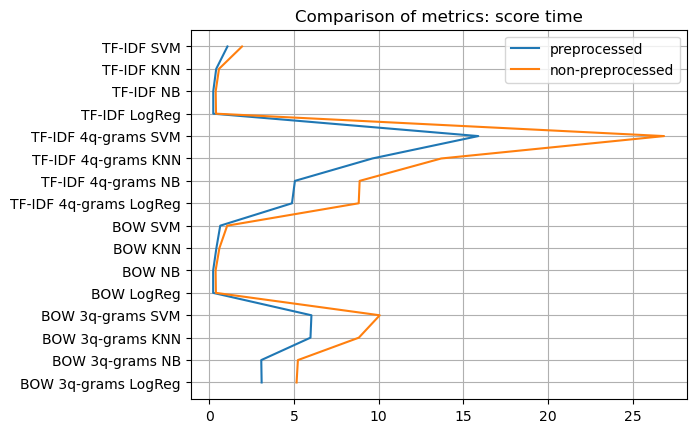

In [263]:
plot('score time')

min value: TF-IDF KNN preprocessed == 0.5223762757558251
max value: TF-IDF 4q-grams SVM preprocessed == 0.8949060032736377


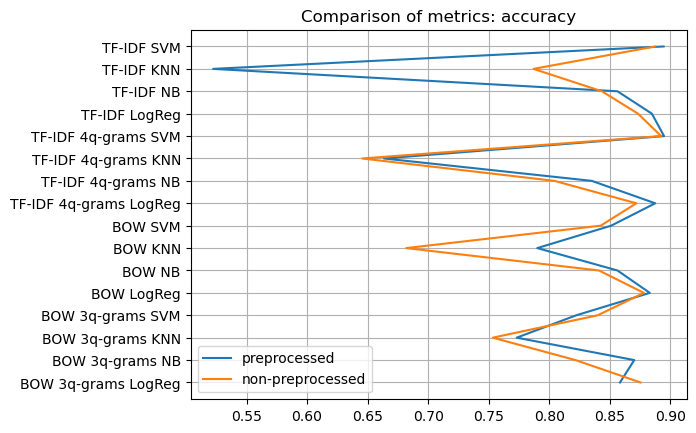

In [264]:
plot('accuracy')

min value: TF-IDF KNN preprocessed == 0.6032899003902893
max value: TF-IDF 4q-grams SVM preprocessed == 0.9004333953692691


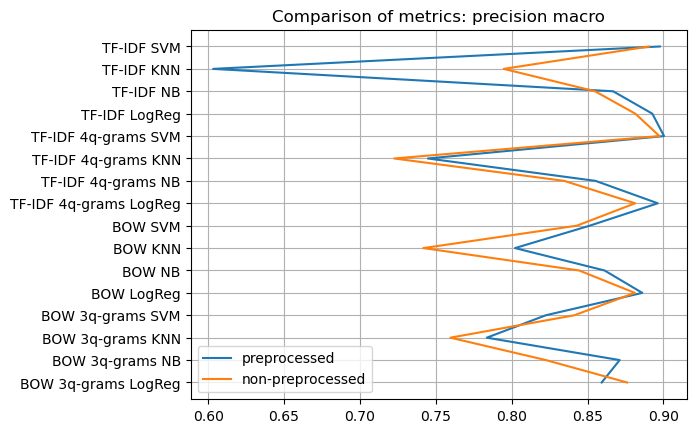

In [271]:
plot('precision macro')

min value: TF-IDF KNN preprocessed == 0.5117935136909593
max value: TF-IDF 4q-grams SVM preprocessed == 0.8936914295988039


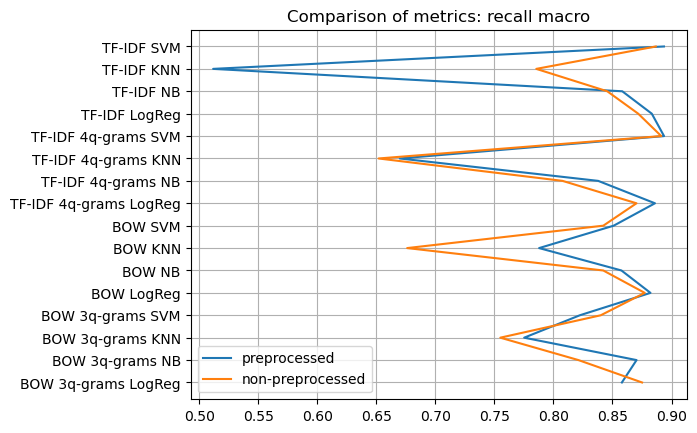

In [265]:
plot('recall macro')

min value: TF-IDF KNN preprocessed == 0.07957341205302745
max value: TF-IDF SVM preprocessed == 0.8876015684609845


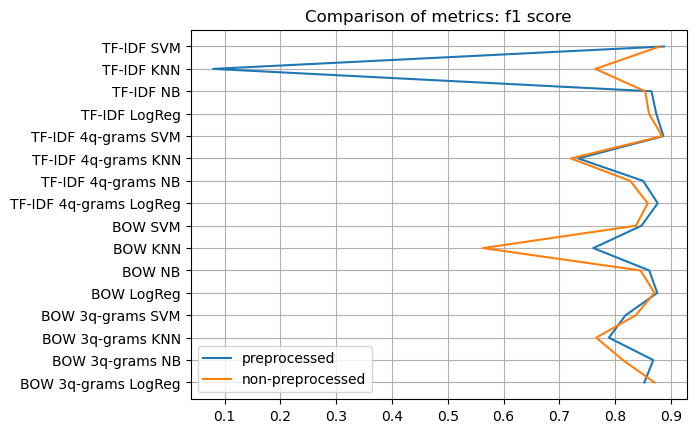

In [266]:
plot('f1 score')

min value: TF-IDF KNN preprocessed == 0.5188050199047713
max value: TF-IDF 4q-grams SVM non-prepocessed == 0.9619438144189749


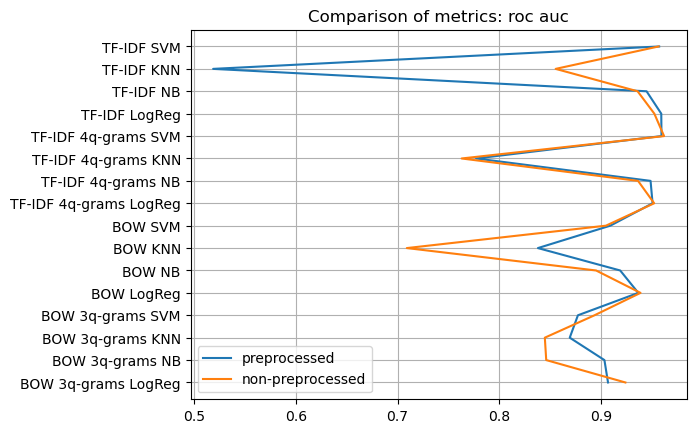

In [267]:
plot('roc auc')

Regardless of the vectorization method, NB and KNN were the fastest *(fit time, score time)* models which is obvious due to specifics of these models. Also, models with preprocessed data were faster too because of fewer vector dimensions in BOW or TF-IDF. This is pretty clear since I've reduced a number of features for vectorizing models by normalizing text and deleting some "unnecessary" information (as we think).

However KNN demonsrates the worst results on all metrics. In comparison with NB, KNN is just a little bit faster, so in this case it makes sense to use NB which is less time efficient but has high enough results.

In most cases, models with preprocessed data really showed the best results. However the best ROC AUC was in TF-IDF 4q-grams SVM non-prepocessed. It seems that TF-IDF is more efficient because of statistical significance of the context in the document during vectorization which is definitely more complex than naive BOW. Moreover, 4q-grams vectorization slightly improved results *(I guess in some cases my hypothesis could be true)*. And, obviously, as the most complex model SVM has the best metrics despite the linearity of the model I have chosen.

To my mind, the most optimal solution is to use **TF-IDF 4q-grams SVM on the preprocessed data**. The only problem with this approach is the relatively high cost of training time.

### Unresolved problems

- I don't know how to fix FutureWarning for my KNN models. I decided to avoid it by using simplefilter because it doesn't seem like something important *(however it may cause low efficiency of the model, I'm not really shure)*

- I didn't optimize different pipelines for my BOW LogReg models which is really bad. Due to the large number of features in BOW 3q-grams vectorization on non-preprocessed data I was forced to increase max_iter value to 2000 iterations in order to get the convergence of the algorithm. However this is not a very optimized approach because other methods of vectorization with other data require many times fewer iteration values.

- I definitely should improve my results visualization skills :)